In [1]:
# enable automatic reloading of the notebook
%load_ext autoreload
%autoreload 2

In [2]:
import ast
import numpy as np
import pandas as pd

from src.utils.NewsArticle import NewsArticle
from src.utils.NewsEvent import NewsEventBase

##### Constants

In [3]:
DATASET_FILE_PATH = "../data/final/og2021.csv"

##### Helper functions

In [4]:
def literal_converter(val):
    try:
        return ast.literal_eval(val)
    except Exception:
        return val

In [5]:
def load_dataset(input_file):
    df = pd.read_csv(
        input_file,
        names=[
            "id",
            "title",
            "body",
            "lang",
            "source",
            "dateTime",
            "url",
            "uri",
            "eventUri",
            "concepts",
            "clusterId",
        ],
        dtype={
            "title": "str",
            "body": "str",
            "lang": "str",
            "source": "str",
            "dateTime": "str",
            "url": "str",
            "uri": "str",
            "eventUri": "str",
            "concepts": "str",
            "clusterId": "str",
            "id": "Int64",
        },
        parse_dates=["dateTime"],
        on_bad_lines="warn",
        engine="python",
        skiprows=1,
    )

    return df

# Load OG2021 dataset

In [6]:
label_df = load_dataset(DATASET_FILE_PATH)

In [7]:
label_df

,id,title,body,lang,source,dateTime,url,uri,eventUri,concepts,clusterId
0,0,Iran's Basketball Team Held At Airport Over 'U...,"Incident comes weeks ahead of Tokyo Olympics, ...",eng,Haberler.com,2021-07-01 06:01:00,https://en.haberler.com/iran-s-basketball-team...,6628239427,NaN,"['olympic_games', 'japan', 'basketball']",wn-1
1,1,Olympics latest: Samoa participation in doubt ...,TOKYO -- The July 23 opening ceremony of the d...,eng,Nikkei Asia,2021-07-01 08:51:00,https://asia.nikkei.com/Spotlight/Tokyo-2020-O...,6628362266,eng-6899867,"['olympic_games', 'japan', 'basketball']",wn-2
2,2,What Do the Olympics Have Against Women?,"Yes, I am talking about how Laurel Hubbard, a ...",eng,Townhall,2021-07-01 08:54:00,https://townhall.com/tipsheet/rebeccadowns/202...,6628364007,eng-6906275,"['olympic_games', 'japan', 'basketball']",wn-3
3,3,Breastfeeding Mother Granted Permission To Bri...,Breastfeeding mothers competing at the Olympic...,eng,www.sportbible.com,2021-07-01 10:10:00,https://www.sportbible.com/australia/news-brea...,6628423216,eng-6906275,"['olympic_games', 'japan', 'basketball']",wn-4
4,4,Sports News | Breastfeeding Olympians Allowed ...,"Canadian basketball player Kim Gaucher, who is...",eng,LatestLY,2021-07-01 10:20:00,https://www.latestly.com/agency-news/sports-ne...,6628431262,eng-6906275,"['olympic_games', 'japan', 'basketball']",wn-4
...,...,...,...,...,...,...,...,...,...,...,...
10935,10935,Juegos Olímpicos ganaron aceptación entre much...,"Antes, muchos japoneses mostraron su reticenci...",spa,www.diariolibre.com,2021-08-13 18:36:00,https://www.diariolibre.com/deportes/olimpismo...,6686899243,spa-2454564,"['olympic_games', 'japan', 'judo']",wn-1347
10936,10936,"Japón, al final, se dejó 'seducir' por los Jue...","Por ahora, hay en muchos japoneses un sentimie...",spa,El Financiero,2021-08-13 21:09:00,https://www.elfinanciero.com.mx/tokio-2020/202...,6687117130,spa-2454564,"['olympic_games', 'japan', 'judo']",wn-1347
10937,10937,Películas esenciales por si te clavaste con el...,La brasileña Rayssa Leal se robó el corazón de...,spa,Chilango,2021-08-13 23:08:00,https://www.chilango.com/cine-y-tv/peliculas-e...,6687247369,NaN,"['olympic_games', 'japan', 'skateboarding']",wn-1350
10938,10938,El alcalde japonés que le tocó ofrecer disculp...,"Por una escena transmitida por televisión, que...",spa,Récord,2021-08-14 02:47:00,https://record.acento.com.do/polideportivo/el-...,6687444123,spa-2455119,"['olympic_games', 'japan', 'judo']",wn-1349


# Dataset analysis

In [8]:
from datachart import bar_chart, heatmap
from datachart.constants import FIG_SIZE, FIG_FORMAT, FONT_WEIGHT, FONT_STYLE, LINE_STYLE, LINE_DRAW_STYLE, NORMALIZE, COLORS
from datachart.config import config
from datachart.utils import save_figure

In [9]:
THEME_CONFIG = {
    # general color style
    "color.general.singular": COLORS.Blue,
    "color.general.multiple": COLORS.Spectral,
    # general font style
    "font.general.family": "sans-serif",
    "font.general.sans-serif": ["Inter"],
    "font.general.color": "#06102B",
    "font.general.size": 11,
    "font.general.style": FONT_STYLE.NORMAL,
    "font.general.weight": FONT_WEIGHT.NORMAL,
    # title size style
    "font.title.size": 12,
    "font.title.color": "#06102B",
    "font.title.style": FONT_STYLE.NORMAL,
    "font.title.weight": FONT_WEIGHT.NORMAL,
    # subtitle size style
    "font.subtitle.size": 11,
    "font.subtitle.color": "#06102B",
    "font.subtitle.style": FONT_STYLE.NORMAL,
    "font.subtitle.weight": FONT_WEIGHT.NORMAL,
    # xlabel size style
    "font.xlabel.size": 10,
    "font.xlabel.color": "#06102B",
    "font.xlabel.style": FONT_STYLE.NORMAL,
    "font.xlabel.weight": FONT_WEIGHT.NORMAL,
    # ylabel size style
    "font.ylabel.size": 10,
    "font.ylabel.color": "#06102B",
    "font.ylabel.style": FONT_STYLE.NORMAL,
    "font.ylabel.weight": FONT_WEIGHT.NORMAL,
    # plot axes style
    "axes.spines.top.visible": True,
    "axes.spines.right.visible": True,
    "axes.spines.bottom.visible": True,
    "axes.spines.left.visible": True,
    "axes.spines.width": 0.5,
    "axes.spines.zorder": 100,
    "axes.ticks.length": 2,
    "axes.ticks.label.size": 9,
    # plot legend style
    "plot.legend.shadow": False,
    "plot.legend.frameon": True,
    "plot.legend.alignment": "left",
    "plot.legend.font.size": 9,
    "plot.legend.title.size": 10,
    "plot.legend.label.color": "#06102B",
    # plot area style
    "plot.area.alpha": 0.3,
    "plot.area.color": "#4D69B2",
    "plot.area.line.width": 0,
    "plot.area.hatch": None,
    "plot.area.zorder": 3,
    # plot grid style
    "plot.grid.alpha": 1,
    "plot.grid.color": "#E6E6E6",
    "plot.grid.line.width": 0.5,
    "plot.grid.line.style": LINE_STYLE.SOLID,
    "plot.grid.zorder": 0,
    # plot line style
    "plot.line.color": "#4D69B2",
    "plot.line.style": LINE_STYLE.SOLID,
    "plot.line.marker": None,
    "plot.line.width": 1,
    "plot.line.alpha": 1.0,
    "plot.line.drawstyle": LINE_DRAW_STYLE.DEFAULT,
    "plot.line.zorder": 3,
    # plot bar style
    "plot.bar.color": "#4D69B2",
    "plot.bar.alpha": 1.0,
    "plot.bar.width": 0.8,
    "plot.bar.zorder": 3,
    "plot.bar.hatch": None,
    "plot.bar.edge.width": 0.5,
    "plot.bar.edge.color": "#06102B",
    "plot.bar.error.color": "#06102B",
    # plot hist style
    "plot.hist.color": "#4D69B2",
    "plot.hist.alpha": 1.0,
    "plot.hist.zorder": 3,
    "plot.hist.fill": None,
    "plot.hist.hatch": None,
    "plot.hist.type": "bar",
    "plot.hist.align": "mid",
    "plot.hist.edge.width": 0.5,
    "plot.hist.edge.color": "#06102B",
    # plot vline style
    "plot.vline.color": "#2FDD92",
    "plot.vline.style": LINE_STYLE.SOLID,
    "plot.vline.width": 1,
    "plot.vline.alpha": 1.0,
    # plot hline style
    "plot.hline.color": "#2FDD92",
    "plot.hline.style": LINE_STYLE.SOLID,
    "plot.hline.width": 1,
    "plot.hline.alpha": 1.0,
    # plot heatmap style
    "plot.heatmap.cmap": COLORS.GnBu,
    "plot.heatmap.alpha": 1.0,
    "plot.heatmap.font.size": 10,
    "plot.heatmap.font.color": "#06102B",
    "plot.heatmap.font.style": FONT_STYLE.NORMAL,
    "plot.heatmap.font.weight": FONT_WEIGHT.NORMAL,
}

In [10]:
config.update_config(config=THEME_CONFIG)

In [11]:
def get_article_group_count(groups, label_func=lambda x: x):
    return [{"label": label_func(group), "y": len(values)} for group, values in groups.items()]

### Article Analysis

In [12]:
iso_to_lang_mapping = {
    "eng": "English",
    "por": "Portuguese",
    "spa": "Spanish",
    "fra": "French",
    "rus": "Russian",
    "deu": "German",
    "slv": "Slovenian",
    "ara": "Arabic",
    "zho": "Chinese",
    #"hrv": "Croatian",
    #"ita": "Italian",
}
def get_lang(x):
    return iso_to_lang_mapping.get(x, "Undefined")

#### Temporal Analysis

In [13]:
def format_date(x):
    def beautify(x):
        return f"0{x}"[-2:]
    return "{}-{}-{}".format(x.year, beautify(x.month), beautify(x.day))

In [14]:
label_df["date"] = label_df["dateTime"].apply(lambda x: format_date(x))

In [15]:
count_by_date = get_article_group_count(label_df.groupby(["date"]).groups)
xlabels = [x["label"] for x in count_by_date]
xticks = [0, 21, 38, len(xlabels)-1]

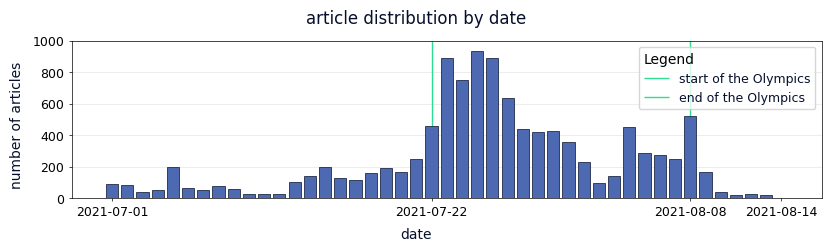

In [16]:
figure = bar_chart(
    {
        "charts": {
            "data": count_by_date,
            "xticks": xticks,
            "xticklabels": [xlabels[idx] for idx in xticks],
            "xtickrotate": 0,
            "vlines": [
                {
                    "x": 21,
                    "ymax": 1000,
                    "label": "start of the Olympics",
                },
                {
                    "x": 38,
                    "ymax": 1000,
                    "label": "end of the Olympics",
                },
            ],
        },
        "ymax": 1000,
        "title": "article distribution by date",
        "xlabel": "date",
        "ylabel": "number of articles",
        "show_legend": True,
        "show_grid": "y",
        "figsize": FIG_SIZE.A4_NARROW,
    }
)
save_figure(figure, "../results/og2021-article-distribution-by-date.png", dpi=300, format=FIG_FORMAT.PNG, transparent=True)

### Language Analysis 

In [17]:
count_by_lang = get_article_group_count(label_df.groupby(["lang"]).groups, label_func=get_lang)
count_by_lang = sorted(count_by_lang, key=lambda x: x["y"], reverse=True)

avg_count = sum([v["y"] for v in count_by_lang]) / len(count_by_lang)

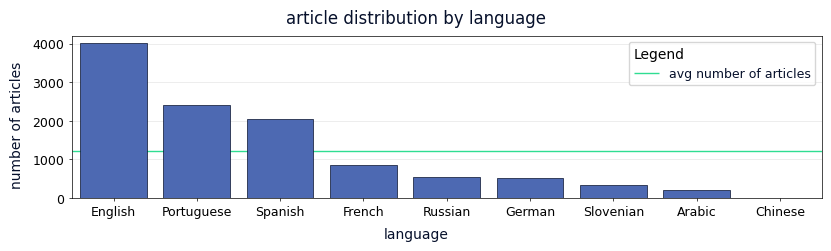

In [18]:
figure = bar_chart({
    "charts": {
        "data": count_by_lang,
        "hlines": [
                {
                    "y": avg_count,
                    "xmin": -0.5,
                    "xmax": len(iso_to_lang_mapping.keys()) - 0.5,
                    "label": "avg number of articles",
                },
            ],
    },
    "title": "article distribution by language",
    "xlabel": "language",
    "ylabel": "number of articles",
    "xmin": -0.5,
    "xmax": len(iso_to_lang_mapping.keys()) - 0.5,
    "show_grid": "y",
    "show_legend": True,
    "figsize": FIG_SIZE.A4_NARROW # (4.1, 2.4) # half the width of the A4
})
save_figure(figure, "../results/og2021-article-distribution-by-lang.png", dpi=300, format=FIG_FORMAT.PNG, transparent=True)

In [19]:
def get_length_stats(df, column):
    vals = [len(x.split()) for x in df[column]]
    return {
        "min": min(vals) if len(vals) > 0 else 0,
        "max": max(vals) if len(vals) > 0 else 0,
        "avg": sum(vals) / len(vals) if len(vals) > 0 else 0,
        "std": np.std(vals) if len(vals) > 0 else 0,
    }

def get_cluster_stats(df, column):
    vals = [len(v) for v in df.groupby([column]).groups.values()]
    return {
        "count": len(vals) if len(vals) > 0 else 0,
        "min": min(vals) if len(vals) > 0 else 0,
        "max": max(vals) if len(vals) > 0 else 0,
        "avg": sum(vals) / len(vals) if len(vals) > 0 else 0,
        "std": np.std(vals) if len(vals) > 0 else 0,
    }

In [20]:
langs = [None] + list(iso_to_lang_mapping.keys())

print("Min, mean, and max article title and body lengths (in characters) by language:")
print(f"Language   & Arts   & tavg (tstd) & bavg  (bstd ) & cls   & cavg (cstd) \\\\")
for lang in langs:
    df = label_df[label_df["lang"] == lang] if lang else label_df
    language = iso_to_lang_mapping.get(lang, "Overall")

    title_stats = get_length_stats(df, "title")
    body_stats = get_length_stats(df, "body")

    cluster_stats = get_cluster_stats(df, "clusterId")
    print(f"{language:<10} & {len(df):<6,.0f} & {title_stats['avg']:<4.0f} ({title_stats['std']:<4,.0f}) & {body_stats['avg']:<5,.0f} ({body_stats['std']:<5,.0f}) & {cluster_stats['count']:<5,} & {cluster_stats['avg']:<4.0f} ({cluster_stats['std']:<4.0f}) \\\\")

Min, mean, and max article title and body lengths (in characters) by language:
Language   & Arts   & tavg (tstd) & bavg  (bstd ) & cls   & cavg (cstd) \\
Overall    & 10,940 & 12   (4   ) & 792   (862  ) & 1,350 & 8    (20  ) \\
English    & 4,009  & 11   (3   ) & 1,231 (1,147) & 729   & 5    (11  ) \\
Portuguese & 2,410  & 13   (3   ) & 527   (374  ) & 368   & 7    (12  ) \\
Spanish    & 2,049  & 13   (4   ) & 562   (427  ) & 381   & 5    (9   ) \\
French     & 845    & 13   (4   ) & 565   (464  ) & 170   & 5    (8   ) \\
Russian    & 553    & 10   (3   ) & 301   (358  ) & 152   & 4    (6   ) \\
German     & 516    & 9    (3   ) & 833   (1,011) & 100   & 5    (6   ) \\
Slovenian  & 331    & 9    (3   ) & 450   (370  ) & 102   & 3    (3   ) \\
Arabic     & 218    & 10   (3   ) & 405   (269  ) & 71    & 3    (3   ) \\
Chinese    & 9      & 2    (1   ) & 56    (36   ) & 5     & 2    (1   ) \\


In [21]:
concepts = [None] + list(label_df["concepts"].unique())

for concept in concepts:
    for lang in langs:
        df = label_df[label_df["concepts"] == concept] if concept else label_df
        df = df[df["lang"] == lang] if lang else df
        language = iso_to_lang_mapping.get(lang, "Overall")

        title_stats = get_length_stats(df, "title")
        body_stats = get_length_stats(df, "body")

        cluster_stats = get_cluster_stats(df, "clusterId")
        print(f"{str(concept):<44} {language:<10} & {len(df):<6,.0f} & {cluster_stats['count']:<5,} \\\\")

None                                         Overall    & 10,940 & 1,350 \\
None                                         English    & 4,009  & 729   \\
None                                         Portuguese & 2,410  & 368   \\
None                                         Spanish    & 2,049  & 381   \\
None                                         French     & 845    & 170   \\
None                                         Russian    & 553    & 152   \\
None                                         German     & 516    & 100   \\
None                                         Slovenian  & 331    & 102   \\
None                                         Arabic     & 218    & 71    \\
None                                         Chinese    & 9      & 5     \\
['olympic_games', 'japan', 'basketball']     Overall    & 2,898  & 368   \\
['olympic_games', 'japan', 'basketball']     English    & 963    & 189   \\
['olympic_games', 'japan', 'basketball']     Portuguese & 293    & 83    \\
['olympic_ga

### Cluster Analysis

In [22]:
def get_time_stats(df, column):
    vals = df.groupby(column)['dateTime'].agg(['min', 'max'])
    return {
        "mean": (vals["max"] - vals["min"]).mean() / np.timedelta64(1, 'D'),
        "std":  (vals["max"] - vals["min"]).std()  / np.timedelta64(1, 'D'),
        "min":  (vals["max"] - vals["min"]).min()  / np.timedelta64(1, 'D'),
        "max":  (vals["max"] - vals["min"]).max()  / np.timedelta64(1, 'D'),
    }

langs = [None] + list(iso_to_lang_mapping.keys())
print("Min, max, mean, and std of cluster duration by language:")
for lang in langs:
    df = label_df[label_df["lang"] == lang] if lang else label_df
    language = iso_to_lang_mapping.get(lang, "Overall")
    title_stats = get_time_stats(df, "clusterId")
    print(f"{language:<10} & {title_stats['min']:<5.2f} & {title_stats['max']:<5.2f} & {title_stats['mean']:<5.2f} & {title_stats['std']:<5.2f} \\\\")

Min, max, mean, and std of cluster duration by language:
Overall    & 0.00  & 19.41 & 0.78  & 1.21  \\
English    & 0.00  & 19.41 & 0.56  & 1.32  \\


Portuguese & 0.00  & 11.49 & 0.67  & 1.10  \\
Spanish    & 0.00  & 12.11 & 0.68  & 1.06  \\
French     & 0.00  & 3.77  & 0.54  & 0.78  \\
Russian    & 0.00  & 3.21  & 0.34  & 0.60  \\
German     & 0.00  & 7.07  & 0.60  & 0.93  \\
Slovenian  & 0.00  & 7.80  & 0.51  & 0.99  \\
Arabic     & 0.00  & 3.35  & 0.48  & 0.65  \\
Chinese    & 0.00  & 2.59  & 0.56  & 1.14  \\


In [23]:
count_by_cluster_id = get_article_group_count(label_df.groupby(["clusterId"]).groups)

In [24]:
cls_sizes = [x["y"] for x in count_by_cluster_id]
min_cls_size = min(cls_sizes)
max_cls_size = max(cls_sizes)

In [25]:
number_of_cls_size = []
for cls_size in range(min_cls_size, max_cls_size + 1):
    count = len([x for x in count_by_cluster_id if x["y"] == cls_size])
    number_of_cls_size.append({"label": cls_size, "y": count})

In [26]:
PERCENTILE = 0.95

cumm_dist = [
    sum([v["y"] for v in number_of_cls_size[: idx + 1]])
    for idx in range(len(number_of_cls_size))
]
quart_th = len(list(filter(lambda x: x <= cumm_dist[-1] * PERCENTILE, cumm_dist)))

In [27]:
number_of_cls_size = number_of_cls_size[:40] + [{"label": "", "y": 0 }]*100 + [number_of_cls_size[-1]]

In [28]:
xlabels = [x["label"] for x in number_of_cls_size]
xticks = [0, quart_th, len(xlabels) - 1]

ymax = 300

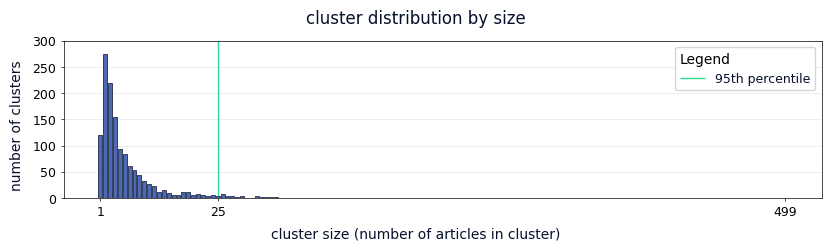

In [29]:
figure = bar_chart({
    "charts": {
        "data": number_of_cls_size,
        "xticks": xticks,
        "xticklabels": [xlabels[idx] for idx in xticks],
        "vlines": {
            "x": quart_th,
            "ymax": ymax,
            "label": f"{PERCENTILE*100:.0f}th percentile",
        }
    },
    "ymax": ymax,
    "title": "cluster distribution by size",
    "xlabel": "cluster size (number of articles in cluster)",
    "ylabel": "number of clusters",
    "figsize": FIG_SIZE.A4_NARROW,
    "show_legend": True,
    "show_grid": "y",
})
save_figure(figure, "../results/og2021-cluster-distribution-by-size.png", dpi=300, format=FIG_FORMAT.PNG, transparent=True)

### Mono- vs multi-lingual cluster analysis

In [30]:
distinct_langs = label_df.groupby(["clusterId"])["lang"].nunique().to_list()
min_dist_langs = min(distinct_langs)
max_dist_langs = max(distinct_langs)

In [31]:
number_of_dist_langs = []
for dist_lang_count in range(min_dist_langs, max_dist_langs + 1):
    count = len([x for x in distinct_langs if x == dist_lang_count])
    number_of_dist_langs.append(
        {
            "label": dist_lang_count,
            "y": count,
        }
    )

In [32]:
sum([x["y"] for x in filter(lambda x: x["label"] != 1, number_of_dist_langs)]) / sum([x["y"] for x in number_of_dist_langs])

0.2777777777777778

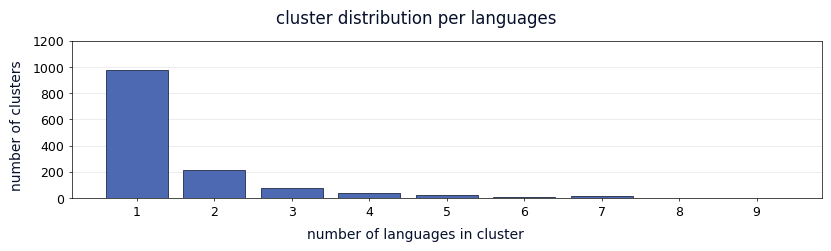

In [33]:
figure = bar_chart({
    "charts": { "data": number_of_dist_langs },
    "title": "cluster distribution per languages",
    "xlabel": "number of languages in cluster",
    "ylabel": "number of clusters",
    "show_grid": "y",
    "figsize": FIG_SIZE.A4_NARROW,
    "ymax": 1200,
})
save_figure(figure, "../results/og2021-cluster-distribution-by-lang.png", dpi=300, format=FIG_FORMAT.PNG, transparent=True)

#### Language coocurrence in clusters analysis

In [34]:
iso_to_idx_mapping = { key: idx for idx, key in enumerate(iso_to_lang_mapping.keys()) }
n_langs = len(iso_to_lang_mapping.keys())

In [35]:
coocurrence = np.array([[0] * n_langs for _ in range(n_langs)])

In [36]:
examples = label_df.groupby(["clusterId"])["lang"].unique().to_list()

In [37]:
for langs in examples:
    for idx in range(len(langs)):
        lang_idx = iso_to_idx_mapping[langs[idx]]
        for idy in range(len(langs)):
            lang_idy = iso_to_idx_mapping[langs[idy]]
            coocurrence[lang_idx][lang_idy] += 1

In [38]:
coocurrence = coocurrence / len(examples)

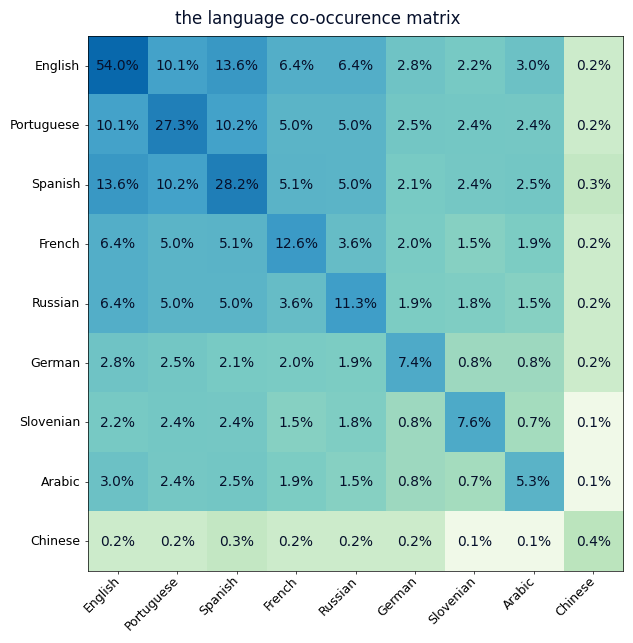

In [88]:
figure = heatmap(
    {
        "charts": {
            "data": coocurrence,
            "norm": NORMALIZE.LOG,
            "valfmt": "{x:.1%}",
            "xticks": [idx for idx in range(n_langs)],
            "xticklabels": [iso_to_lang_mapping[key] for key in iso_to_idx_mapping.keys()],
            "xtickrotate": 45,
            "yticks": [idx for idx in range(n_langs)],
            "yticklabels": [iso_to_lang_mapping[key] for key in iso_to_idx_mapping.keys()],
        },
        "title": "the language co-occurence matrix",
        "figsize": FIG_SIZE.SQUARE,
        "show_heatmap_vals": True,
    }
)
save_figure(figure, "../results/og2021-cluster-language-cooccurence.png", dpi=300, format=FIG_FORMAT.PNG, transparent=True)

# Final save of the dataset

In [90]:
import uuid
import math

Prepare the final dataset

In [91]:
final_df = pd.DataFrame(label_df[["id", "title", "body", "lang", "source", "dateTime", "url", "clusterId"]])
final_df.rename(columns={ "dateTime": "published_at", "clusterId": "cluster_id" }, inplace=True)

Create the mapping between the cluster ID and the unique identifier

In [92]:
id_mapping = { cluster_id: str(uuid.uuid4()).split("-")[0] for cluster_id in final_df["cluster_id"].unique()}

In [93]:
len(set(id_mapping.keys())) == len(set(id_mapping.values()))

True

In [94]:
final_df["cluster_id"] = final_df["cluster_id"].map(lambda x: f"cls-{id_mapping[x]}")

In [95]:
final_df

,id,title,body,lang,source,published_at,url,cluster_id
0,0,Iran's Basketball Team Held At Airport Over 'U...,"Incident comes weeks ahead of Tokyo Olympics, ...",eng,Haberler.com,2021-07-01 06:01:00,https://en.haberler.com/iran-s-basketball-team...,cls-28ced65f
1,1,Olympics latest: Samoa participation in doubt ...,TOKYO -- The July 23 opening ceremony of the d...,eng,Nikkei Asia,2021-07-01 08:51:00,https://asia.nikkei.com/Spotlight/Tokyo-2020-O...,cls-8eb8df54
2,2,What Do the Olympics Have Against Women?,"Yes, I am talking about how Laurel Hubbard, a ...",eng,Townhall,2021-07-01 08:54:00,https://townhall.com/tipsheet/rebeccadowns/202...,cls-3ee1cc3c
3,3,Breastfeeding Mother Granted Permission To Bri...,Breastfeeding mothers competing at the Olympic...,eng,www.sportbible.com,2021-07-01 10:10:00,https://www.sportbible.com/australia/news-brea...,cls-49c24cb8
4,4,Sports News | Breastfeeding Olympians Allowed ...,"Canadian basketball player Kim Gaucher, who is...",eng,LatestLY,2021-07-01 10:20:00,https://www.latestly.com/agency-news/sports-ne...,cls-49c24cb8
...,...,...,...,...,...,...,...,...
10935,10935,Juegos Olímpicos ganaron aceptación entre much...,"Antes, muchos japoneses mostraron su reticenci...",spa,www.diariolibre.com,2021-08-13 18:36:00,https://www.diariolibre.com/deportes/olimpismo...,cls-4e17beb8
10936,10936,"Japón, al final, se dejó 'seducir' por los Jue...","Por ahora, hay en muchos japoneses un sentimie...",spa,El Financiero,2021-08-13 21:09:00,https://www.elfinanciero.com.mx/tokio-2020/202...,cls-4e17beb8
10937,10937,Películas esenciales por si te clavaste con el...,La brasileña Rayssa Leal se robó el corazón de...,spa,Chilango,2021-08-13 23:08:00,https://www.chilango.com/cine-y-tv/peliculas-e...,cls-a2208557
10938,10938,El alcalde japonés que le tocó ofrecer disculp...,"Por una escena transmitida por televisión, que...",spa,Récord,2021-08-14 02:47:00,https://record.acento.com.do/polideportivo/el-...,cls-83f2a7a0


In [96]:
final_df.to_csv("../data/final/og2021.full.csv", encoding="utf-8", index=False)

Trim the body to contain at most 15% of the original text

In [97]:
def trim_body(x):
    max_id = math.floor(len(x) * 0.15)
    return x[:max_id]

In [98]:
final_df["body"] = final_df["body"].map(lambda x: trim_body(x))

In [99]:
final_df

,id,title,body,lang,source,published_at,url,cluster_id
0,0,Iran's Basketball Team Held At Airport Over 'U...,"Incident comes weeks ahead of Tokyo Olympics, ...",eng,Haberler.com,2021-07-01 06:01:00,https://en.haberler.com/iran-s-basketball-team...,cls-28ced65f
1,1,Olympics latest: Samoa participation in doubt ...,TOKYO -- The July 23 opening ceremony of the d...,eng,Nikkei Asia,2021-07-01 08:51:00,https://asia.nikkei.com/Spotlight/Tokyo-2020-O...,cls-8eb8df54
2,2,What Do the Olympics Have Against Women?,"Yes, I am talking about how Laurel Hubbard, a ...",eng,Townhall,2021-07-01 08:54:00,https://townhall.com/tipsheet/rebeccadowns/202...,cls-3ee1cc3c
3,3,Breastfeeding Mother Granted Permission To Bri...,Breastfeeding mothers competing at the Olympic...,eng,www.sportbible.com,2021-07-01 10:10:00,https://www.sportbible.com/australia/news-brea...,cls-49c24cb8
4,4,Sports News | Breastfeeding Olympians Allowed ...,"Canadian basketball player Kim Gaucher, who is...",eng,LatestLY,2021-07-01 10:20:00,https://www.latestly.com/agency-news/sports-ne...,cls-49c24cb8
...,...,...,...,...,...,...,...,...
10935,10935,Juegos Olímpicos ganaron aceptación entre much...,"Antes, muchos japoneses mostraron su reticenci...",spa,www.diariolibre.com,2021-08-13 18:36:00,https://www.diariolibre.com/deportes/olimpismo...,cls-4e17beb8
10936,10936,"Japón, al final, se dejó 'seducir' por los Jue...","Por ahora, hay en muchos japoneses un sentimie...",spa,El Financiero,2021-08-13 21:09:00,https://www.elfinanciero.com.mx/tokio-2020/202...,cls-4e17beb8
10937,10937,Películas esenciales por si te clavaste con el...,La brasileña Rayssa Leal se robó el corazón de...,spa,Chilango,2021-08-13 23:08:00,https://www.chilango.com/cine-y-tv/peliculas-e...,cls-a2208557
10938,10938,El alcalde japonés que le tocó ofrecer disculp...,"Por una escena transmitida por televisión, que...",spa,Récord,2021-08-14 02:47:00,https://record.acento.com.do/polideportivo/el-...,cls-83f2a7a0


In [100]:
final_df.to_csv("../data/final/og2021.research.csv", encoding="utf-8", index=False)

In [80]:
langs = [None] + list(iso_to_lang_mapping.keys())

print("Min, mean, and max article title and body lengths (in characters) by language:")
print(f"Language   & Arts   & tavg (tstd) & bavg  (bstd ) & cls   & cavg (cstd) \\\\")
for lang in langs:
    df = final_df[label_df["lang"] == lang] if lang else final_df
    language = iso_to_lang_mapping.get(lang, "Overall")

    title_stats = get_length_stats(df, "title")
    body_stats = get_length_stats(df, "body")

    cluster_stats = get_cluster_stats(df, "cluster_id")
    print(f"{language:<10} & {len(df):<6,.0f} & {title_stats['avg']:<4.0f} ({title_stats['std']:<4,.0f}) & {body_stats['avg']:<5,.0f} ({body_stats['std']:<5,.0f}) & {cluster_stats['count']:<5,} & {cluster_stats['avg']:<4.0f} ({cluster_stats['std']:<4.0f}) \\\\")

Min, mean, and max article title and body lengths (in characters) by language:
Language   & Arts   & tavg (tstd) & bavg  (bstd ) & cls   & cavg (cstd) \\
Overall    & 10,940 & 12   (4   ) & 118   (128  ) & 1,350 & 8    (20  ) \\
English    & 4,009  & 11   (3   ) & 183   (171  ) & 729   & 5    (11  ) \\
Portuguese & 2,410  & 13   (3   ) & 79    (56   ) & 368   & 7    (12  ) \\
Spanish    & 2,049  & 13   (4   ) & 84    (64   ) & 381   & 5    (9   ) \\
French     & 845    & 13   (4   ) & 85    (70   ) & 170   & 5    (8   ) \\
Russian    & 553    & 10   (3   ) & 45    (54   ) & 152   & 4    (6   ) \\
German     & 516    & 9    (3   ) & 125   (153  ) & 100   & 5    (6   ) \\
Slovenian  & 331    & 9    (3   ) & 66    (54   ) & 102   & 3    (3   ) \\
Arabic     & 218    & 10   (3   ) & 60    (40   ) & 71    & 3    (3   ) \\
Chinese    & 9      & 2    (1   ) & 9     (5    ) & 5     & 2    (1   ) \\


Prepare the data set for the public

In [101]:
final_df = final_df[["id", "title", "lang", "source", "published_at", "url", "cluster_id"]]

In [102]:
final_df.to_csv("../data/final/og2021.public.csv", encoding="utf-8", index=False)